<a href="https://colab.research.google.com/github/Isenlith/ANASIN-II/blob/master/Filtros_FIR_IIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

##Filtro FIR

$y[n] = \sum_{k=0}^{n} b[k] \cdot x[n-k]$

In [0]:
def FIR(x, b):
  y = [] # inicializando y

  for n in range(x.shape[0]):
    s = 0 # inicializando o somatório
    for k in range(b.shape[0]):
      if n - k < 0: # para os casos como x[-1], x[-2], tomamos como zero o valor deles
        s += 0
      else:
        s += b[k] * x[n - k]
    y.append(s)

  y =  np.asarray(y) # é melhor trabalhar com arrays
  return y

In [0]:
b = np.array([0.1, 0.2, 0.3])
x = np.array([1, 0, 0, 2, 0, 1, 4, 3])

print (FIR(x, b))

[0.1 0.2 0.3 0.2 0.4 0.7 0.6 1.4]


##Filtro IIR

$y[0] = b \quad$ e

$y[n] = bx[n] + ay[n-1]$

Função impulso

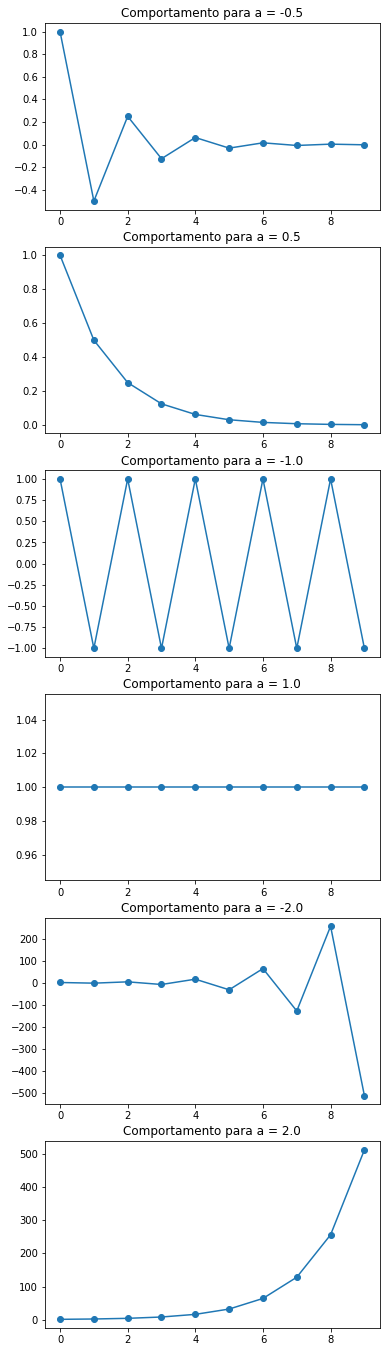

In [0]:
plt.rcParams["figure.figsize"] = [6, 24]

x = signal.unit_impulse(10)
b = 1
a = np.array([-0.5, 0.5, -1, 1, -2, 2])
m = len(a)

def IIR(x, a, b):

  y = []

  for n in range(x.shape[0]):
    if n - 1 < 0:
      y.append(b)
    else:
      aux = b * x[n] + a * y[n - 1]
      y.append(aux)
    
  return y

for i in range(a.shape[0]):
  y = IIR(x, a[i], b)
  plt.subplot(m, 1, i+1)
  plt.plot(y, 'o-')
  plt.title('Comportamento para a = %.1f' %a[i])

Para o valor de a = -0.5 o comportamento é estável e decai exponencialmente oscilatória.

Para o valor de a = 0.5 o comportamento é estável e decai exponencialmente.

Para o valor de a = -1 o comportamento é oscilatório e está associado aos polos existirem apenas no eixo imaginário do plano imaginário.

Para o valor de a = 1 o comportamento é constante e está associado ao polo = 0 no plano imaginário.

Para o valor de a = -2 o comportamento é instável e cresce de for exponencialmente escilatória.

Para o valor de a = 2 o comportamento é instável e cresce exponencialmente.


